In [1]:
# Question 1
import pandas as pd
df = pd.read_csv('./data.csv')
df.head(10)


,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,product_id,quantity,unit_price,promo_item_yn
0,7.0,01/04/2019,12:04:43,Oulet A,12.0,558.0,N,52.0,1.0,2.50,N
1,11.0,01/04/2019,15:54:39,Oulet A,17.0,781.0,N,27.0,2.0,3.50,N
2,19.0,01/04/2019,14:34:59,Oulet A,17.0,788.0,Y,46.0,2.0,2.50,N
3,32.0,01/04/2019,16:06:04,Oulet A,12.0,683.0,N,23.0,2.0,2.50,N
4,33.0,01/04/2019,19:18:37,Oulet A,17.0,99.0,Y,34.0,1.0,2.45,N
5,39.0,01/04/2019,18:54:46,Oulet A,17.0,664.0,Y,32.0,1.0,3.00,N
6,50.0,01/04/2019,13:03:49,Oulet A,12.0,316.0,N,49.0,2.0,3.00,N
7,53.0,01/04/2019,11:21:14,Oulet A,12.0,38.0,N,60.0,1.0,3.75,N
8,59.0,01/04/2019,19:30:55,Oulet A,12.0,370.0,Y,51.0,2.0,3.00,N
9,62.0,01/04/2019,12:01:00,Oulet A,12.0,180.0,Y,49.0,2.0,3.00,N


In [2]:
df.tail(10)

,transaction_id,transaction_date,transaction_time,sales_outlet_id,staff_id,customer_id,instore_yn,product_id,quantity,unit_price,promo_item_yn
389,1725.0,01/04/2019,13:58:36,Outlet G,12.0,246.0,N,23.0,1.0,2.50,N
390,1729.0,01/04/2019,15:50:25,Outlet G,17.0,541.0,N,35.0,1.0,3.10,N
391,1737.0,01/04/2019,19:00:45,Outlet G,12.0,60.0,N,60.0,2.0,3.75,N
392,1737.0,01/04/2019,19:00:45,Outlet G,12.0,60.0,N,69.0,1.0,3.25,N
393,1739.0,01/04/2019,18:32:25,Outlet G,17.0,697.0,N,52.0,2.0,2.50,N
394,1742.0,01/04/2019,18:39:29,Outlet G,17.0,678.0,N,22.0,1.0,2.00,N
395,1745.0,01/04/2019,16:58:42,Outlet G,17.0,753.0,Y,58.0,1.0,3.50,N
396,1745.0,01/04/2019,16:58:42,Outlet G,17.0,753.0,Y,69.0,1.0,3.25,N
397,1747.0,01/04/2019,11:41:37,Outlet G,12.0,42.0,Y,40.0,2.0,3.75,N
398,1749.0,01/04/2019,18:21:22,Outlet G,17.0,117.0,N,46.0,1.0,2.50,N


In [3]:
num_rows, num_cols = df.shape
print(f"The DataFrame has {num_rows} rows and {num_cols} columns") 

The DataFrame has 399 rows and 11 columns


<Axes: title={'center': 'Sales by Outlet'}, xlabel='Sales Outlet', ylabel='Count'>

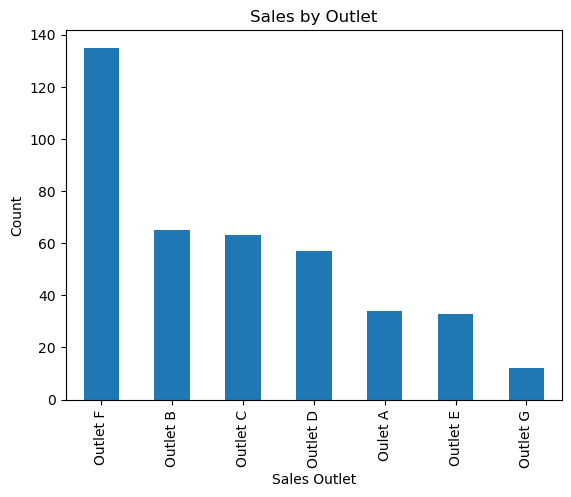

In [4]:
# Question 2
outlet_counts = df['sales_outlet_id'].value_counts()
outlet_counts.plot(kind = 'bar', title = 'Sales by Outlet', xlabel = 'Sales Outlet', ylabel = 'Count')

The minimum transaction_id is  7.00 and the maximum transaction_id is  1749.00
The minimum customer_id is  2.00
The maximum customer_id is  796.00
the average customer_id is  380.92


<Axes: title={'center': 'In-Store Sales Proportion'}, ylabel='instore_yn'>

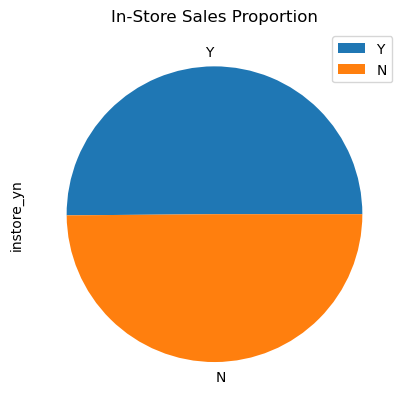

In [5]:

# find the minimum and maximum transaction_id values
min_id = df['transaction_id'].min()
max_id = df['transaction_id'].max()

print(f"The minimum transaction_id is {min_id: .2f} and the maximum transaction_id is {max_id: .2f}")

min_customer_id = df['customer_id'].min()
max_customer_id = df['customer_id'].max()
average_customer_id = df['customer_id'].mean()

print(f"The minimum customer_id is {min_customer_id: .2f}")
print(f"The maximum customer_id is {max_customer_id: .2f}")
print(f"the average customer_id is {average_customer_id: .2f}")

# count the number of occurrences of each unique value in the column
yn_counts = df['instore_yn'].value_counts()

# plot the resulting Series as a pie chart
yn_counts.plot(kind= 'pie', title = 'In-Store Sales Proportion', legend = True)

In [11]:
#Question 3

# Create a new column called unit_price_corrected
df['unit_price_corrected'] = df['unit_price']

# Add 1.50 to unit_price for the first 100 items
df.loc[df.index < 100, 'unit_price_corrected'] += 1.50

# Subtract 1.50 from unit_price for the remaining items
df.loc[df.index >= 100, 'unit_price_corrected'] -= 1.50

# Calculate average unit prices
average_unit_price = df['unit_price'].mean()
average_unit_price_corrected = df['unit_price_corrected'].mean()

# Print the results
print(f"Average unit price: {average_unit_price:.2f}")
print(f"Average corrected unit price: {average_unit_price_corrected:.2f}")


Average unit price: 3.16
Average corrected unit price: 2.41


<Axes: title={'center': 'Total Revenue by Sales Outlet'}, xlabel='Sales Outlet', ylabel='Total Revenue'>

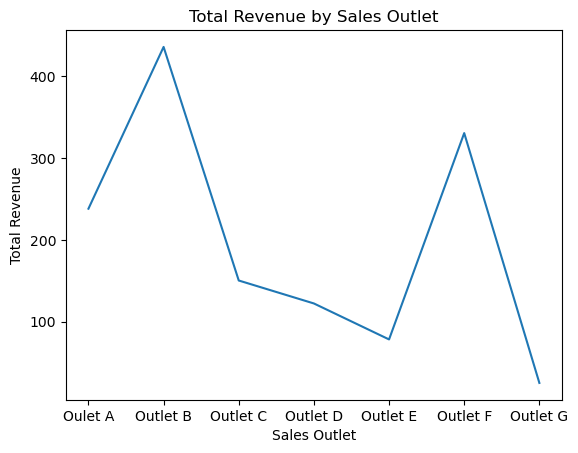

In [7]:
# Question 4
# calculate the revenue for each transaction
df['revenue'] = df['unit_price_corrected'] * df['quantity']

# group the dataframe by sales_outlet_id and calculate the total revenue for each outlet
outlet_revenue = df.groupby('sales_outlet_id')['revenue'].sum()

# print the outlet revenue
outlet_revenue.plot(xlabel = 'Sales Outlet', ylabel = 'Total Revenue', title = 'Total Revenue by Sales Outlet', kind = 'line')

<Axes: title={'center': 'Total Revenue Sold by Staff'}, xlabel='Staff ID', ylabel='Total Revenue'>

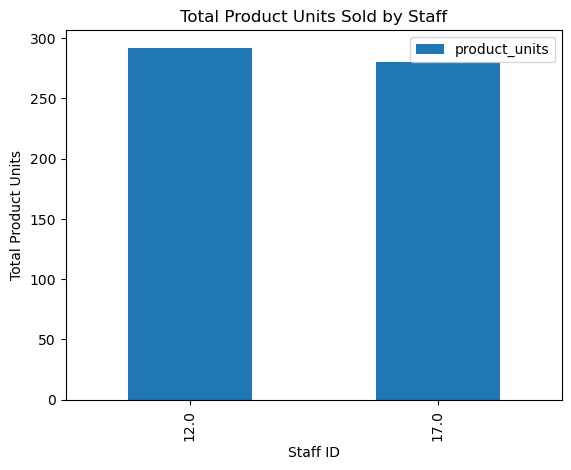

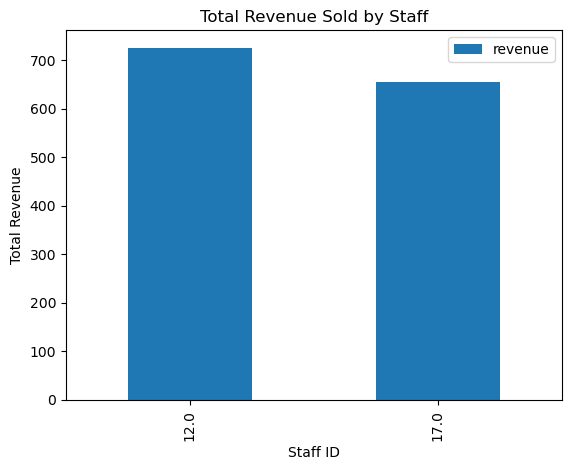

In [13]:
# Question 5
# Calculate the revenue and product units for each transaction
df['revenue'] = df['unit_price_corrected'] * df['quantity']
df['product_units'] = df['quantity']

# Group the dataframe by staff_id and calculate the total revenue and product units sold for each staff member
staff_sales = df.groupby('staff_id')[['revenue', 'product_units']].sum()

# Plot the total product units sold by staff
staff_sales.plot(kind='bar', y='product_units', xlabel='Staff ID', ylabel='Total Product Units', title='Total Product Units Sold by Staff', legend=True)

# Plot the total revenue sold by staff
staff_sales.plot(kind='bar', y='revenue', xlabel='Staff ID', ylabel='Total Revenue', title='Total Revenue Sold by Staff', legend=True)

<Axes: title={'center': 'Quantity by each outlet'}, xlabel='Sales Outlet', ylabel='Quantity'>

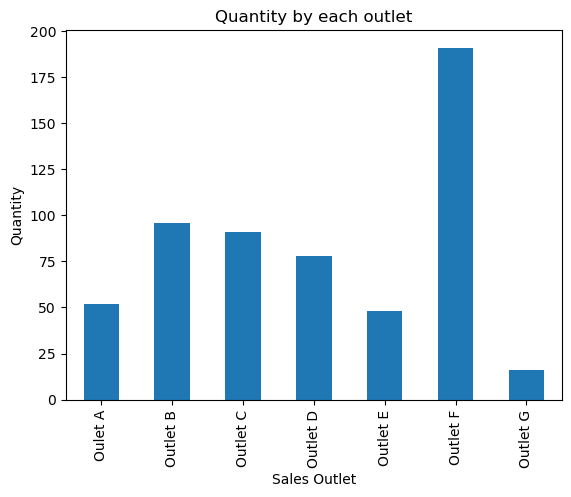

In [9]:
# Question 6
# Create a bar chart mapping 'quantity' with 'product_id'
outlet_quantity = df.groupby('sales_outlet_id')['quantity'].sum()
outlet_quantity.plot(xlabel = 'Sales Outlet', ylabel = 'Quantity', kind = 'bar', title= "Quantity by each outlet")

<Axes: title={'center': 'Unit price corrected Range'}, xlabel='Index', ylabel='Unit price corrected'>

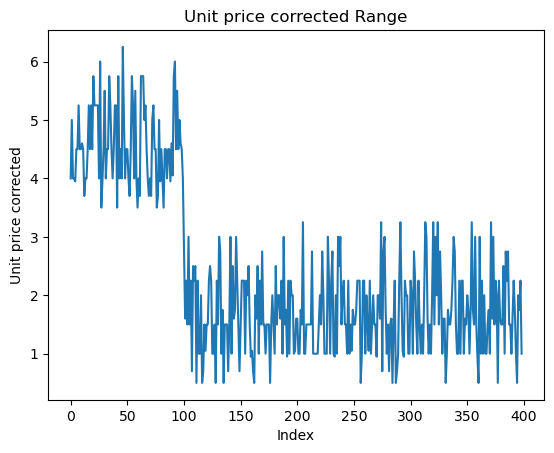

In [36]:
# Question 7
df['unit_price_corrected'].plot(title = 'Unit price corrected Range', kind= 'line', xlabel= 'Index', ylabel ='Unit price corrected')

In [10]:
# Part 2
def cafe_management_system():
    menu_items = []
    items_price = {}
    items_quantity = {}
    items_rating = {}

    # Allow the café admin to enter the menu items
    while True:
        item = input("Enter a menu item (or 'quit' to stop): ")
        if item.lower() == "quit":
            break
        menu_items.append(item)

    # Create dictionary for menu item prices
    for item in menu_items:
        price = float(input(f"Enter the price for {item}: "))
        items_price[item] = price

    # Create dictionary for menu item quantities
    for item in menu_items:
        quantity = int(input(f"Enter the quantity for {item}: "))
        items_quantity[item] = quantity

    # Create dictionary for menu item ratings
    for item in menu_items:
        rating = int(input(f"Enter the rating for {item} (1-5): "))
        items_rating[item] = rating

    # Return data structures
    return items_price, items_quantity, items_rating

# Call the function and store the returned data structures
items_price, items_quantity, items_rating = cafe_management_system()

# Create a dictionary that includes all entries
all_entries = {
    "price": items_price,
    "quantity": items_quantity,
    "rating": items_rating
}

# Create a list of items with satisfaction of 3 or higher
satisfied_items = [item for item, rating in items_rating.items() if rating >= 3]

# Create a list of items with price above 10
high_price_items = [item for item, price in items_price.items() if price > 10]

# Create a list of items with quantity less than 5
few_items = [item for item, quantity in items_quantity.items() if quantity < 5]

# Print the results
print("All Entries:", all_entries)
print("Satisfied Items:", satisfied_items)
print("High Price Items:", high_price_items)
print("Few Items:", few_items)


Enter a menu item (or 'quit' to stop): capachino
Enter a menu item (or 'quit' to stop): espresso
Enter a menu item (or 'quit' to stop): three milk cake
Enter a menu item (or 'quit' to stop): latte
Enter a menu item (or 'quit' to stop): black coffee
Enter a menu item (or 'quit' to stop): cold coffee
Enter a menu item (or 'quit' to stop): hot coffee
Enter a menu item (or 'quit' to stop): quit
Enter the price for capachino: 50
Enter the price for espresso: 8
Enter the price for three milk cake: 9
Enter the price for latte: 18
Enter the price for black coffee: 5
Enter the price for cold coffee: 9
Enter the price for hot coffee: 4
Enter the quantity for capachino: 2
Enter the quantity for espresso: 40
Enter the quantity for three milk cake: 39
Enter the quantity for latte: 21
Enter the quantity for black coffee: 23
Enter the quantity for cold coffee: 43
Enter the quantity for hot coffee: 23
Enter the rating for capachino (1-5): 5
Enter the rating for espresso (1-5): 4
Enter the rating for t